In [14]:
#Graph Gen 1.1 (27/03/2025)
# Added inputs and outputs
# The power consumption for a node ranges from 1 to 50 units and uniformly distributed.
# Plus the area may vary from 1 to 5 units as well, uniformly distributed
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
import random

def generate_netlist(
    num_nodes=50,
    num_edges=100,
    enable_area=True,
    #Area (chip constraints) of the node or the gate assembly
    enable_power=True,
    # Power consumption of the gate (used to optimize or reduce heat generation or power consumption per chip)
    enable_wire_count=True,
    # Number of wires represented by an edge
    enable_distance=True,
    # Distance of the wire to calculate power dissipation and delay
    seed = None
):
    """Generates a netlist as a graph with configurable node & edge attributes."""
    if seed:
        random.seed(seed)
        np.random.seed(seed)

    #Generate a directed graph
    G = nx.DiGraph()

    # Estimate number of inputs and outputs
    # Assuming num_inputs and num_outputs to be the functions below
    num_inputs = math.ceil(math.log2(num_nodes))
    num_outputs = math.ceil(num_inputs / 2)
    input_nodes = [f"IN_{i}" for i in range(num_inputs)]
    output_nodes = [f"OUT_{i}" for i in range(num_outputs)]


    # Create internal nodes
    for i in range(num_nodes):
        node_name = f"N_{i}"
        G.add_node(node_name)

        if enable_area:
            G.nodes[node_name]['area'] = round(random.uniform(1.0, 5.0), 2)
        if enable_power:
            G.nodes[node_name]['power'] = round(random.uniform(1.0, 50.0), 2)

    # Create input and output nodes
    for node in input_nodes + output_nodes:
        G.add_node(node)

    # Ensure the graph is connected using a spanning tree first
    all_nodes = input_nodes + [f"N_{i}" for i in range(num_nodes)]
    random.shuffle(all_nodes)
    for i in range(len(all_nodes) - 1):
        G.add_edge(all_nodes[i], all_nodes[i + 1])
        if enable_wire_count:
            G.edges[all_nodes[i], all_nodes[i + 1]]['wires'] = random.randint(1, 5)
        if enable_distance:
            G.edges[all_nodes[i], all_nodes[i + 1]]['distance'] = round(random.uniform(1.0, 10.0), 2)

    # Add additional random edges while keeping the graph connected
    existing_edges = set(G.edges())
    while len(G.edges()) < num_edges:
        u, v = random.sample(all_nodes, 2)
        if u != v and (u, v) not in existing_edges:
            G.add_edge(u, v)
            existing_edges.add((u, v))
            if enable_wire_count:
                G.edges[u, v]['wires'] = random.randint(1, 5)
            if enable_distance:
                G.edges[u, v]['distance'] = round(random.uniform(1.0, 10.0), 2)

    # Ensure each output node has at least one incoming connection
    for out_node in output_nodes:
        if G.in_degree(out_node) == 0:
            source_node = random.choice(all_nodes)
            G.add_edge(source_node, out_node)
            if enable_wire_count:
                G.edges[source_node, out_node]['wires'] = random.randint(1, 5)
            if enable_distance:
                G.edges[source_node, out_node]['distance'] = round(random.uniform(1.0, 10.0), 2)

    return G, input_nodes, output_nodes

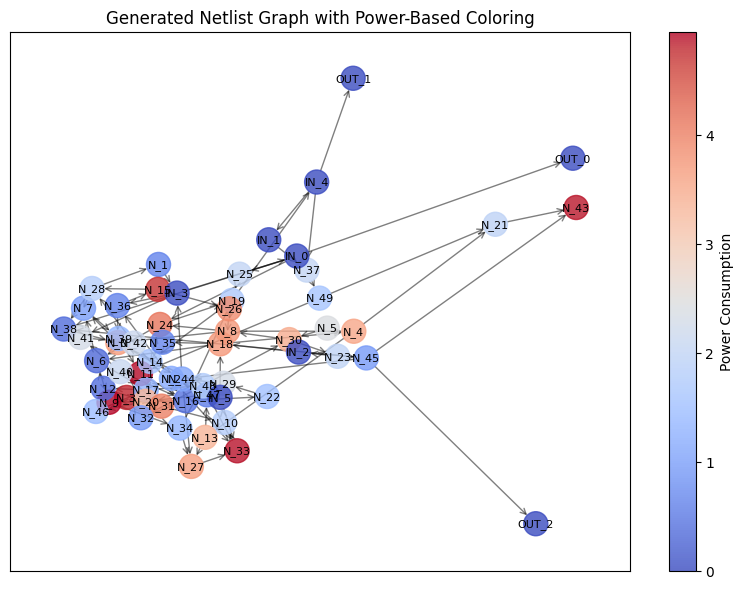

In [15]:
def visualize_netlist(G):
    pos = nx.spring_layout(G, seed=42)
    power_values = [G.nodes[n].get('power', 0) for n in G.nodes()]

    plt.figure(figsize=(10, 7))
    nodes = nx.draw_networkx_nodes(G, pos, node_color=power_values, cmap='coolwarm', alpha=0.8)
    nx.draw_networkx_edges(G, pos, alpha=0.5, arrowstyle='->', arrows=True)
    nx.draw_networkx_labels(G, pos, font_size=8)

    cbar = plt.colorbar(nodes)
    cbar.set_label("Power Consumption")
    plt.title("Generated Netlist Graph with Power-Based Coloring")
    plt.show()

# Example usage
graph, inputs, outputs = generate_netlist(num_nodes=50, num_edges=100)
visualize_netlist(graph)
